In [6]:
# Useful starting lines
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '../')
from utils.implementation_utils import *
from utils.preprocessing_utils import *
import datetime
from model import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
from utils.io_utils import *
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, tX, tXt, ids = load_csv_data(DATA_TRAIN_PATH)
print(y.shape, tX.shape)

(250000,) (250000, 30)


In [15]:
def run_model_split_(save_weights=False, retrain=True, internal_test=True, create_submission=False, add_bias_term=True):
    y, X, Xt, ids = load_csv_data('../data/train.csv')
    print('Data shape: ', y.shape, X.shape)
    degrees = [3, 4, 5, 6, 7, 8]
    losses = []
    for degree in degrees:
        X_list, y_list, rmv_idx_list = preprocess_train_data_split(X[:10000], y[:10000], degree)
        ws = []
        losses_split = []
        for i, (y, X, rmv_idx), in enumerate(zip(y_list, X_list, rmv_idx_list)):
            if add_bias_term:
                X = np.concatenate((np.ones(X.shape[0])[:, np.newaxis], X), axis=1)
            k_fold = 10
            k_indices = build_k_indices(y, k_fold)
            w_split = []
            losses_k = []
            for k in range(k_fold):
                start_time = datetime.now()
                X_train, y_train, X_test, y_test = split_cross_validation(y, X, k_indices, k)
                y_train_dist = np.asarray((np.unique(y_train, return_counts=True))).T
                y_test_dist = np.asarray((np.unique(y_test, return_counts=True))).T
                #with np.printoptions(precision=0, suppress=True):
                #    print(f'y_train distribution: {y_train_dist} \ny_test distribution: {y_test_dist}')

                if not retrain:
                    w = np.loadtxt('sgd_model.csv', delimiter=',')
                else:
                    w, loss = train(X_train, y_train, rmv_idx)
                    losses_k.append(loss)
                    w_split.append(w)
                    end_time = datetime.now()
                    exection_time = (end_time - start_time).total_seconds()
                    print("Model training time={t:.3f} seconds".format(t=exection_time))

                if internal_test:
                    print(f'Test for datasplit : {i}, k {k} and degree {degree}')
                    test(w, X_test, y_test)
            ws.append(w_split)
            losses_split.append(np.mean(losses_k))
        losses.append(np.mean(losses_split))

        ws_best = find_best_w(ws, losses)
        print('Best weights : ',ws_best)
        
    return losses

In [16]:
losses = run_model_split_()

Data shape:  (250000,) (250000, 30)
Removed features indexes :  [ 4  5  6  8 12 19 22 23 24 25 26 27 28 29]
Removed features indexes :  [ 3  4  5  6  9 12 22 23 26 27 28]
Removed features indexes :  [22 23 29]
Removed features indexes :  [21 22 29]
Model training time=0.352 seconds
Test for datasplit : 0, k 0 and degree 3
y_pred mean :  -0.2875179817335463
Model accuracy: 80.29925187032418
Model training time=0.362 seconds
Test for datasplit : 0, k 1 and degree 3
y_pred mean :  -0.2557224610986405
Model accuracy: 76.30922693266832
Model training time=0.364 seconds
Test for datasplit : 0, k 2 and degree 3
y_pred mean :  -0.29644674004356
Model accuracy: 78.30423940149626
Model training time=0.494 seconds
Test for datasplit : 0, k 3 and degree 3
y_pred mean :  -0.26897871743847557
Model accuracy: 80.79800498753117
Model training time=0.730 seconds
Test for datasplit : 0, k 4 and degree 3
y_pred mean :  -0.26436749276344035
Model accuracy: 78.80299251870325
Model training time=0.630 secon

Removed features indexes :  [  0   1   4   5   8   9  12  13  16  17  21  24  25  30  31  32  33  34
  35  36  37  44  45  48  49  52  53  54  55  56  57  60  61  64  65  68
  69  72  73  77  78  79  80  81  82  83  85  88  89  90  92  93  96  97
  98  99 100 101 105 106 107 108 109 110 111 113 116 117 118 120 121 124
 125 128 129 130 132 133 136 137 141 142 143 144 145 146 147 149 152 153
 154 156 157 160 161 165 166 167 168 169 170 171 173 176 177 178 180 181]
Model training time=0.683 seconds
Test for datasplit : 0, k 0 and degree 5
y_pred mean :  -0.0034440061008992316
Model accuracy: 59.13978494623656
Model training time=0.274 seconds
Test for datasplit : 0, k 1 and degree 5
y_pred mean :  -0.06444917193808726
Model accuracy: 67.74193548387096
Model training time=0.359 seconds
Test for datasplit : 0, k 2 and degree 5
y_pred mean :  0.013456090067014478
Model accuracy: 55.913978494623656
Model training time=0.389 seconds
Test for datasplit : 0, k 3 and degree 5
y_pred mean :  -0.00

Removed features indexes :  [  0   1   4   5   6   7   8   9  10  11  14  15  16  17  18  19  20  21
  24  25  26  27  28  29  30  31  34  35  36  37  38  39  40  41  45  46
  47  48  49  50  51  52  53  54  55  56  59  60  61  62  63  64  65  66
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 109 110 111 112
 113 114 115 116 119 120 121 122 123 124 125 126 129 130 131 132 133 134
 135 136 139 140 141 142 143 144 145 146 149 150 151 152 153 154 155 156
 159 160 161 162 164 165 166 169 170 171 172 173 174 175 176 180 181 182
 183 184 185 186 187 188 189 190 191 192 193 194 195 196 199 200 201 202
 204 205 206 207 209 210 211 214 215 216 217 218 219 220 221 225 226 227
 228 229 230 231 232 233 234 235 236 237 238 239 240 241 244 245 246 247
 249 250 251 252 253 254 255 256 259 260 261 262 263 264 265 266 269 270
 271 272 274 275 276 277 278 279 280 281 284 285 286 287 288 289 290 291
 295 296 297 298 299 30

Removed features indexes :  [  0   1   4   5   6   7   8   9  10  11  12  13  16  17  18  19  20  21
  22  23  24  25  28  29  30  31  32  33  34  35  36  37  40  41  42  43
  44  45  46  47  48  49  53  54  55  56  57  58  59  60  61  62  63  64
  65  66  67  70  71  72  73  74  75  76  77  78  79  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 130
 131 132 133 134 135 136 137 138 139 142 143 144 145 146 147 148 149 150
 151 154 155 156 157 158 159 160 161 162 163 166 167 168 169 170 171 172
 173 174 175 178 179 180 181 182 183 184 185 186 187 190 191 192 193 194
 196 197 198 199 200 201 202 203 204 205 208 209 210 211 212 213 214 215
 216 217 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 238
 239 240 241 242 244 245 246 247 248 249 250 251 252 253 255 256 257 258
 259 262 263 264 265 266 267 268 269 270 271 275 276 277 278 279 280 281
 282 283 284 285 286 28

Removed features indexes :  [  0   1   4   5   6   7   8   9  10  11  12  13  14  15  18  19  20  21
  22  23  24  25  26  27  28  29  32  33  34  35  36  37  38  39  40  41
  42  43  46  47  48  49  50  51  52  53  54  55  56  57  61  62  63  64
  65  66  67  68  69  70  71  72  73  74  75  76  77  78  81  82  83  84
  85  86  87  88  89  90  91  92  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 125 126 127 128
 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
 147 148 151 152 153 154 155 156 157 158 159 160 161 162 165 166 167 168
 169 170 171 172 173 174 175 176 179 180 181 182 183 184 185 186 187 188
 189 190 193 194 195 196 197 198 199 200 201 202 203 204 207 208 209 210
 211 212 213 214 215 216 217 218 221 222 223 224 225 226 228 229 230 231
 232 233 234 235 236 237 238 239 242 243 244 245 246 247 248 249 250 251
 252 253 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272
 273 274 277 278 279 28

In [11]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [12]:
sample_range = [0, 2000]
X_sample = tX[sample_range[0] : sample_range[1]]
y_sample = y[sample_range[0] : sample_range[1]]
ids_sample = ids[sample_range[0] : sample_range[1]]
pd.DataFrame(y_sample)

,0
0,1.0
1,-1.0
2,-1.0
3,-1.0
4,-1.0
...,...
1995,1.0
1996,-1.0
1997,-1.0
1998,1.0


In [13]:
rmv_indx = [0, 2, 3, 4, 6, 8, 12, 20, 23]
test_list, y_list, ids_list = split_data_for_test_submit(ids_sample, X_sample, y_sample, rmv_indx)
#y_pred = predict_label()
# Store prediction in a list, Here we need to replace y_list by prediction_list
y_r = np.concatenate((y_list[0], y_list[1], y_list[2], y_list[3]), axis=0)[:, np.newaxis]
ids_r = np.concatenate((ids_list[0], ids_list[1], ids_list[2], ids_list[3]), axis=0)[:, np.newaxis]
sorted_arr = np.concatenate((ids_r, y_r), axis=1)
sorted_arr = sorted_arr[sorted_arr[:, 0].argsort()]
rec_y = np.squeeze(np.delete(sorted_arr, 0, axis=1))
sum_ = sum(y_sample - rec_y)
print(sum_)
pd.DataFrame([y_sample, rec_y])

0.0


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,1750,1751,1752,1753,1754,1755,1756,1757,1758,1759,1760,1761,1762,1763,1764,1765,1766,1767,1768,1769,1770,1771,1772,1773,1774,1775,1776,1777,1778,1779,1780,1781,1782,1783,1784,1785,1786,1787,1788,1789,1790,1791,1792,1793,1794,1795,1796,1797,1798,1799,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,1838,1839,1840,1841,1842,1843,1844,1845,1846,1847,1848,1849,1850,1851,1852,1853,1854,1855,1856,1857,1858,1859,1860,1861,1862,1863,1864,1865,1866,1867,1868,1869,1870,1871,1872,1873,1874,1875,1876,1877,1878,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,1910,1911,1912,1913,1914,1915,1916,1917,1918,1919,1920,1921,1922,1923,1924,1925,1926,1927,1928,1929,1930,1931,1932,1933,1934,1935,1936,1937,1938,1939,1940,1941,1942,1943,1944,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,...,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,

In [44]:
from utils.io_utils import *
DATA_TRAIN_PATH = '../data/test.csv' # TODO: download train data and supply path here 
y_te, tX_te, tXt, ids_te = load_csv_data(DATA_TRAIN_PATH)
print(y_te.shape, tX_te.shape)

(568238,) (568238, 30)


In [25]:
new_data, _, rmv_ind = preprocess_train_data_split(tX, y)

[ 4  5  6  8 12 22 23 24 25 26 27 28 29]
[ 3  4  5  6  9 12 22 23 26 27 28]
[22 23 29]
[21 22 29]


In [37]:
data_list, y_list, feat_ind = subdivide_data(tX, y)
new_data_list = []
for tx, y in zip(data_list, y_list):
    new_data_list.append(new_data)

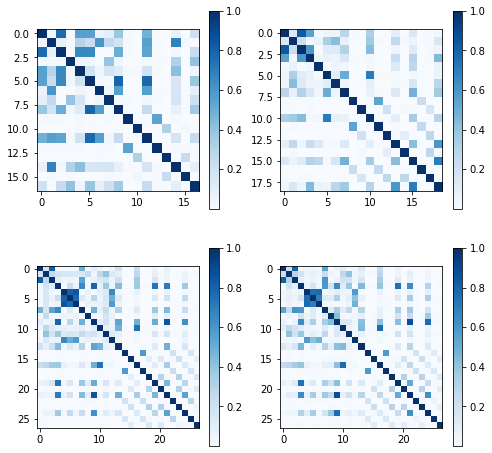

In [41]:
corr_mat_0 = np.ma.corrcoef(new_data[0], rowvar=False)
corr_mat_1 = np.ma.corrcoef(new_data[1], rowvar=False)
corr_mat_2 = np.ma.corrcoef(new_data[2], rowvar=False)
corr_mat_3 = np.ma.corrcoef(new_data[3], rowvar=False)

corr_mat_list = [corr_mat_0, corr_mat_1, corr_mat_2, corr_mat_3]

#for i, corr in enumerate(corr_mat_list):
#    corr_mat_list[i][corr < 0.9] = 0
#    corr_mat_list[i][corr >= 0.9] = 1

fig = plt.figure(figsize=(8, 8))
for i in range(1, 5):
    fig.add_subplot(2, 2, i)
    plt.imshow(np.abs(corr_mat_list[i - 1]), cmap='Blues')
    plt.colorbar()
plt.show()
    
#plt.imshow(np.abs(corr_mat), cmap='Blues')
#plt.colorbar()
#plt.show()

In [96]:
corr_indices = np.argwhere(np.abs(np.triu(corr_mat - np.eye(30))) > 0.8)
print(corr_indices)

[[ 0  2]
 [ 3  9]
 [ 3 23]
 [ 3 29]
 [ 4  5]
 [ 9 21]
 [ 9 23]
 [ 9 29]
 [21 29]
 [22 29]
 [23 29]
 [26 29]]


In [97]:
unique_ind1 = np.unique(corr_indices[:, 0])
unique_ind2 = np.unique(corr_indices[:, 1])
print(unique_ind1, unique_ind2)

[ 0  3  4  9 21 22 23 26] [ 2  5  9 21 23 29]


In [98]:
len1 = len(unique_ind1)
len2 = len(unique_ind2)
corr_ind_reduce_short = (unique_ind1, unique_ind2)[len(unique_ind1) > len(unique_ind2)]
corr_ind_reduce_big = (unique_ind1, unique_ind2)[len(unique_ind1) < len(unique_ind2)]
corr_ind_to_keep = []
for ind in corr_ind_reduce_short:
    is_in = np.isin(ind, corr_ind_reduce_big)
    if not is_in:
        corr_ind_to_keep.append(ind)

In [99]:
all_ind = np.unique(corr_indices.flatten())
print(all_ind.shape)

(11,)


In [100]:
corr_ind_to_throw = np.setdiff1d(all_ind, corr_ind_to_keep)

In [101]:
np.array(corr_ind_to_keep), corr_ind_to_throw

(array([ 2,  5, 29]), array([ 0,  3,  4,  9, 21, 22, 23, 26]))

In [107]:
keep, throw = feature_selection(new_data, 0.8)

In [108]:
keep, throw

(array([ 2,  5, 29]), array([ 0,  3,  4,  9, 21, 22, 23, 26]))

In [19]:
ind = np.array((rmv_ind[0], rmv_ind[1]))
print(ind)

[array([ 4,  5,  6,  8, 12, 22, 23, 24, 25, 26, 27, 28, 29])
 array([ 3,  4,  5,  6,  9, 12, 22, 23, 26, 27, 28])]


/Users/AntoineDaeniker/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [6]:
ws = load_csv_data('../sgd_model_split.csv')

ValueError: Some errors were detected !
    Line #3 (got 29 columns instead of 21)
    Line #4 (got 28 columns instead of 21)